# Gradient Descent

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-fundations)
3. [Method Categories](#method-categories)
4. [Learning Rate](#learning-rate)
5. [Algorithm Steps](#algorithm-steps)
    -[A simple example](#a-simple-example)
6. [Advantages of Gradient Descent](#advantages-of-gradient-descent)
7. [Challenges with Gradient Descent](#challenges-with-gradient-descent)
8. [Suitable Tasks](#suitable-tasks)
9. [References](#references)


## Introduction

Gradient descent is an optimization algorithm that has been widely used in machine learning and deep learning to minimize the loss function and update the model's parameters. The algorithm was first proposed by Cauchy in 1847, and since then, it has become one of the most popular algorithms for training models, particularly in the field of machine learning. Its main purpose is to find the minimum of a function, and it is commonly used to minimize the loss function during the training process of a machine learning model.

## Mathematical Foundations

The gradient descent algorithm aims to find the minimum of a function $f(\boldsymbol{w})$, where $\boldsymbol{w}$ is a vector of parameters. The gradient of the function $\nabla f(\boldsymbol{w})$ represents the direction of the steepest increase in the function's value. The update rule for gradient descent is:

$$\boldsymbol{w}_{t+1} = \boldsymbol{w}_t - \eta \nabla f(\boldsymbol{w}_t)$$

where:
- $\boldsymbol{w}_t$: The parameter vector at iteration $t$.
- $\eta$: The learning rate, which controls the step size in each iteration.
- $\nabla f(\boldsymbol{w}_t)$: The gradient of the function evaluated at $\boldsymbol{w}_t$.

The learning rate $\eta$ is a hyperparameter that needs to be tuned. If it is too small, the algorithm will converge slowly, while if it is too large, it may overshoot the minimum and diverge.

## Method Categories

In Gradient Descent, the process of updating the model parameters depends on the number of training examples used to compute the gradient of the cost function. Based on the number of training examples, Gradient Descent can be classified into three categories: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent.

1. `Batch Gradient Descent`:
In Batch Gradient Descent, **the entire training set** is used to compute the gradient of the cost function. The parameters are then updated by taking a step in the negative direction of the gradient. Batch Gradient Descent is computationally efficient and guarantees convergence to a global minimum. However, it can be slow on large datasets since it requires the entire dataset to be loaded into memory.

2. `Stochastic Gradient Descent`:
In Stochastic Gradient Descent, the gradient of the cost function is computed for a **single training example at a time**. The parameters are updated immediately after each computation, and the process is repeated for all the training examples. Stochastic Gradient Descent is computationally efficient and converges faster than Batch Gradient Descent. However, it can be noisy and may not converge to the global minimum.

3. `Mini-batch Gradient Descent`:
In Mini-batch Gradient Descent, **a small random subset of the training set** is used to compute the gradient of the cost function. The parameters are then updated based on the average of the gradients computed for the subset. Mini-batch Gradient Descent combines the advantages of Batch Gradient Descent and Stochastic Gradient Descent. It is computationally efficient and converges faster than Batch Gradient Descent. It is also less noisy than Stochastic Gradient Descent and can converge to a better minimum.

Here is a table to summarize the differences between the three methods:

| Parameter | Batch Gradient Descent | Stochastic Gradient Descent | Mini-Batch Gradient Descent |
| :--- | :--- | :--- | :--- |
| Update rule | $w(t+1) = w(t) - \eta \cdot \nabla f(w(t))$ | $w(t+1) = w(t) - \eta \cdot \nabla f(w(t, i))$ | $w(t+1) = w(t) - \eta \cdot \nabla f(w(t, i:i+b))$ |
| Convergence | Slower | Faster | Faster |
| Convergence to global minima | Yes | No (May get stuck in local minima) | No (May get stuck in local minima) |
| Computational Efficiency | Low | High | High |
| Stuck at saddle points | Yes | No | No |
| Noise in the convergence process | Low | High | Low |
| Data usage | Use all training data at each iteration | Use one training example at each iteration | Use a mini-batch of training examples at each iteration |
| Memory Usage | High                   | Low                           | Moderate                    |
| Examples | Linear regression, logistic regression | Neural networks | Neural networks |


## Learning Rate:

The **learning rate**, often denoted by `α`, is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the cost function. If the learning rate is too small, the algorithm takes a long time to converge; if it's too large, the algorithm might overshoot the minimum and fail to converge.

In practice, finding a good learning rate often requires trial and error.

Besides, a **learning rate schedule** is a technique used in gradient descent optimization algorithms to gradually decrease the learning rate over time as the model approaches the optimal weights. This technique is used to improve the convergence rate of the model and avoid overshooting the minimum of the loss function, especially for the stochastic gradient descent algorithm in which randomness can cause the model to overshoot the minimum.

Using a learning rate schedule can be beneficial for all three types of gradient descent, batch, stochastic, and mini-batch.

In batch gradient descent, the learning rate schedule can be used to adjust the learning rate as the algorithm progresses through the epochs. This can be useful in cases where the loss function is not smooth or has many local minima.

For stochastic gradient descent, a learning rate schedule can be used to adaptively adjust the learning rate based on the error of the model. This can help the model converge faster and more efficiently.

In mini-batch gradient descent, a learning rate schedule can be used to adjust the learning rate based on the size of the mini-batch. This can help the model converge faster and reduce oscillations in the loss function.


## Algorithm Steps:

1. **Initialize**: Start with random values for the parameters.

2. **Compute Gradient**: Calculate the gradient of the cost function with respect to each parameter.

3. **Update Parameters**: Update each parameter by subtracting the product of the learning rate and the gradient of the cost function with respect to that parameter.

4. **Iterate**: Repeat steps 2 and 3 until the algorithm converges to a minimum.

### A simple example:

Here is a simple example of gradient descent in action. We will assume the following cost function:  $f(x) = x^2 - 4x + 5$. 

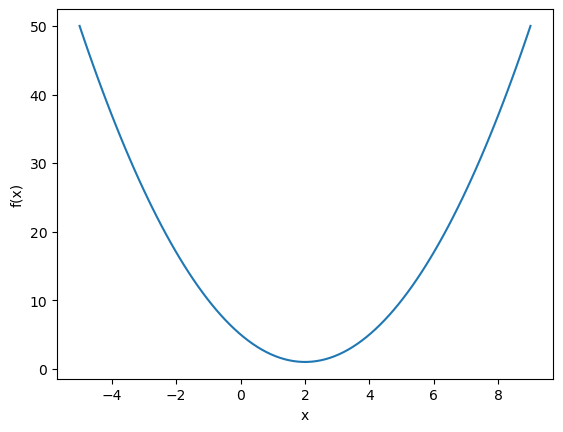

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2 - 4*x + 5

# Create an array of x values
x = np.linspace(-5, 9, 100)

# Plot the function
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


We will define the gradient of the cost function as: $\nabla f(x) = 2x - 4$. And define the gradient descent function.

We will also assume that the initial value of x is -4. We will use a learning rate of 0.1 and run the algorithm for 20 iterations.

Minimum value of f(x) = 1.00 at x = 1.93


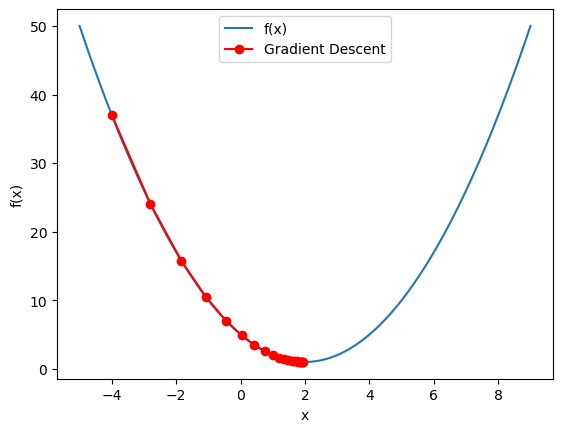

In [2]:
# Define the gradient function
def grad_f(x):
    return 2*x - 4

# Define the gradient descent function
def gradient_descent(f, grad_f, x_init, learning_rate=0.1, max_iters=100):
    # A random intial value
    x = x_init 
    # Create an empty list to store the history of x values
    x_hist = [x] 
    # Iterate up to max_iters times
    for i in range(max_iters):
        # Compute the gradient at the current point
        grad = grad_f(x)
        
        # Update the current point using the gradient and learning rate
        x -= learning_rate * grad
        
        # Add the current point to the history list
        x_hist.append(x)

    # Return the final point, the value of the function at the final point,
    # and the list of all x values visited during the optimization process
    return x, f(x), x_hist

# Assume the random initial value of x is -4
x_init = -4

# Call the gradient descent function
x_min, f_min, x_hist = gradient_descent(f, grad_f, x_init, learning_rate=0.1, max_iters=20)

# Print the results
print(f"Minimum value of f(x) = {f_min:.2f} at x = {x_min:.2f}")

# Plot the function and the gradient descent steps
plt.plot(x, f(x), label='f(x)')
plt.plot(x_hist, f(np.array(x_hist)), 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


Using the learning rate 0.1, it finds the minimum in 20 iterations.

Let's try a smaller learning rate with the same number of iterations. 

Minimum value of f(x) = 17.05 at x = -2.01


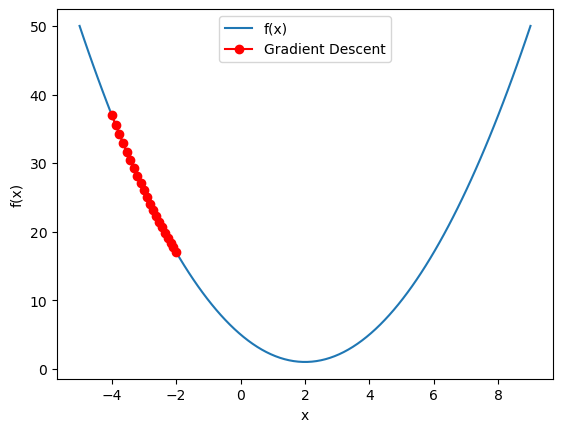

In [3]:
# Try a smaller learning rate with the same number of iterations
# Call the gradient descent function
x_min, f_min, x_hist = gradient_descent(f, grad_f, x_init, learning_rate=0.01, max_iters=20)

# Print the results
print(f"Minimum value of f(x) = {f_min:.2f} at x = {x_min:.2f}")

# Plot the function and the gradient descent steps
plt.plot(x, f(x), label='f(x)')
plt.plot(x_hist, f(np.array(x_hist)), 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Using the learning rate 0.01, it does not converge to the minimum in 20 iterations. So we have to increase the number of iterations.

If we try a larger learning rate as below, the algorithm overshoots the minimum and diverges. It finds the minimum in this case but it may not converge even if we increase the number of iterations using a large learning rate.

Minimum value of f(x) = 1.00 at x = 1.93


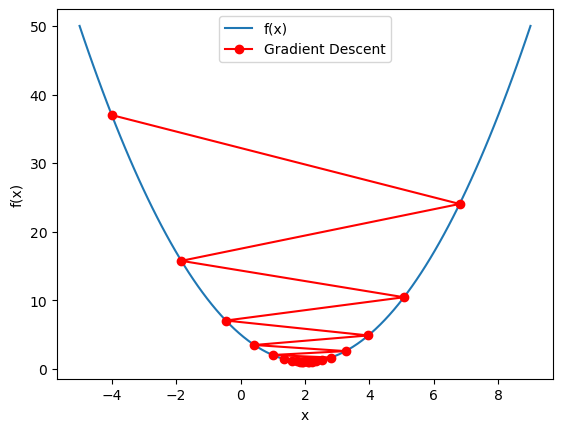

In [4]:
# Try a larger learning rate with the same number of iterations
# Call the gradient descent function
x_min, f_min, x_hist = gradient_descent(f, grad_f, x_init, learning_rate=0.9, max_iters=20)

# Print the results
print(f"Minimum value of f(x) = {f_min:.2f} at x = {x_min:.2f}")

# Plot the function and the gradient descent steps
plt.plot(x, f(x), label='f(x)')
plt.plot(x_hist, f(np.array(x_hist)), 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## Advantages of Gradient Descent

1. **Efficiency**: Gradient descent is a very efficient algorithm for minimizing the cost function in machine learning models, particularly in deep learning models where the cost function is often very complex and high dimensional.

2. **Flexibility**: Gradient descent can be used with different types of cost functions, such as mean squared error or cross-entropy, and can be adapted to different learning rates and batch sizes to optimize the performance of the model.

3. **Parallelization**: Gradient descent can be easily parallelized across multiple processors or GPUs, which can significantly speed up the training process for large datasets and complex models.

4. **Regularization**: Gradient descent can be combined with regularization techniques, such as L1 and L2 regularization, to prevent overfitting and improve the generalization performance of the model.

5. **Interpretability**: The gradient vector can be used to understand how the cost function is changing with respect to each parameter in the model, which can help with model interpretation and feature selection.

6. **Scalability**: Gradient descent is a scalable algorithm that can handle large datasets and complex models, making it a popular choice for training deep learning models and other machine learning models.

## Challenges with Gradient Descent:

1. **Local Minima**: For some functions, there may be multiple places where the gradient is zero (minima). Gradient descent is a local optimization method, which means it can get stuck in a sub-optimal local minimum, rather than finding the global minimum.

2. **Saddle Points**: These are points where all derivatives are zero but are not a local minimum or maximum. The algorithm can get stuck in these points, especially in high-dimensional spaces.

3. **Slow Convergence**: In some cases, if the learning rate is too small or if the function is badly scaled (e.g., more curved in one dimension than in another), then gradient descent can converge very slowly to the minimum.

4. **Choosing the Right Learning Rate**: If the learning rate is too high, gradient descent can overshoot the minimum and may fail to converge, or even diverge. If the learning rate is too low, the algorithm will eventually reach the minimum, but it might take too much time.

5. **Dependency on Initial Values**: The initial values of the parameters can impact the solution, especially in the presence of local minima. Different initial values can lead to different solutions.

## Suitable Tasks

Gradient descent can be applied to a wide range of optimization tasks in machine learning and deep learning, including:

- Linear regression
- Logistic regression
- Neural networks
- Support vector machines (with the appropriate kernel and loss function)

It is particularly useful for problems with large datasets or a high number of parameters, where other optimization algorithms may be too computationally expensive.

## References

1. Cauchy, A. (1847). Méthode générale pour la résolution des systemes d’équations simultanées. Comp. Rend. Sci. Paris, 25(1847), 536-538.
2. Bottou, L. (2010). Large-scale machine learning with stochastic gradient descent. In Proceedings of COMPSTAT'2010: 19th International Conference on Computational StatisticsParis France, August 22-27, 2010 Keynote, Invited and Contributed Papers (pp. 177-186). Physica-Verlag HD.
3. Ruder, S. (2016). An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747.
3. Scikit-Learn Logistic Regression Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".